In [45]:
# import all required libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from tqdm import tqdm

In [2]:
# read the dataset
df = pd.read_csv("D:/Internshala/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2112443,183,PAYMENT,9132.97,C2040799774,0.00,0.00,M1266227060,0.00,0.00,0,0
6067160,514,CASH_IN,253365.31,C1660873680,835618.42,1088983.73,C1997962630,3092564.25,2839198.94,0,0
477034,19,CASH_IN,34267.94,C1642651276,27386468.71,27420736.65,C46229814,11494608.08,11554024.90,0,0
831706,41,PAYMENT,4190.91,C942449710,0.00,0.00,M332368511,0.00,0.00,0,0
638547,35,PAYMENT,5605.66,C292436785,415520.37,409914.71,M717488346,0.00,0.00,0,0
1723738,160,CASH_IN,275179.19,C1922159750,5847047.30,6122226.49,C308019560,3137627.34,2862448.15,0,0
1455031,140,CASH_IN,89791.04,C440868228,3617502.58,3707293.62,C1809235929,535902.01,446110.97,0,0
4943758,350,CASH_OUT,17102.48,C200357758,0.00,0.00,C1615052771,318244.05,335346.53,0,0
1049829,95,CASH_OUT,325481.69,C33714430,0.00,0.00,C1596289722,4810201.61,5135683.30,0,0
3134172,236,PAYMENT,182.70,C741101479,0.00,0.00,M1998494265,0.00,0.00,0,0


In [4]:
df.info()

# as we can see the columns [type, nameOrig, nameDest] have object datatype so will have to change that while training the model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
# to fine how many null values are there in each column
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# to fine how many unique values are there in each column
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [8]:
# df1 = df.sample(n=600000, random_state=0)


<AxesSubplot:xlabel='isFraud', ylabel='isFlaggedFraud'>

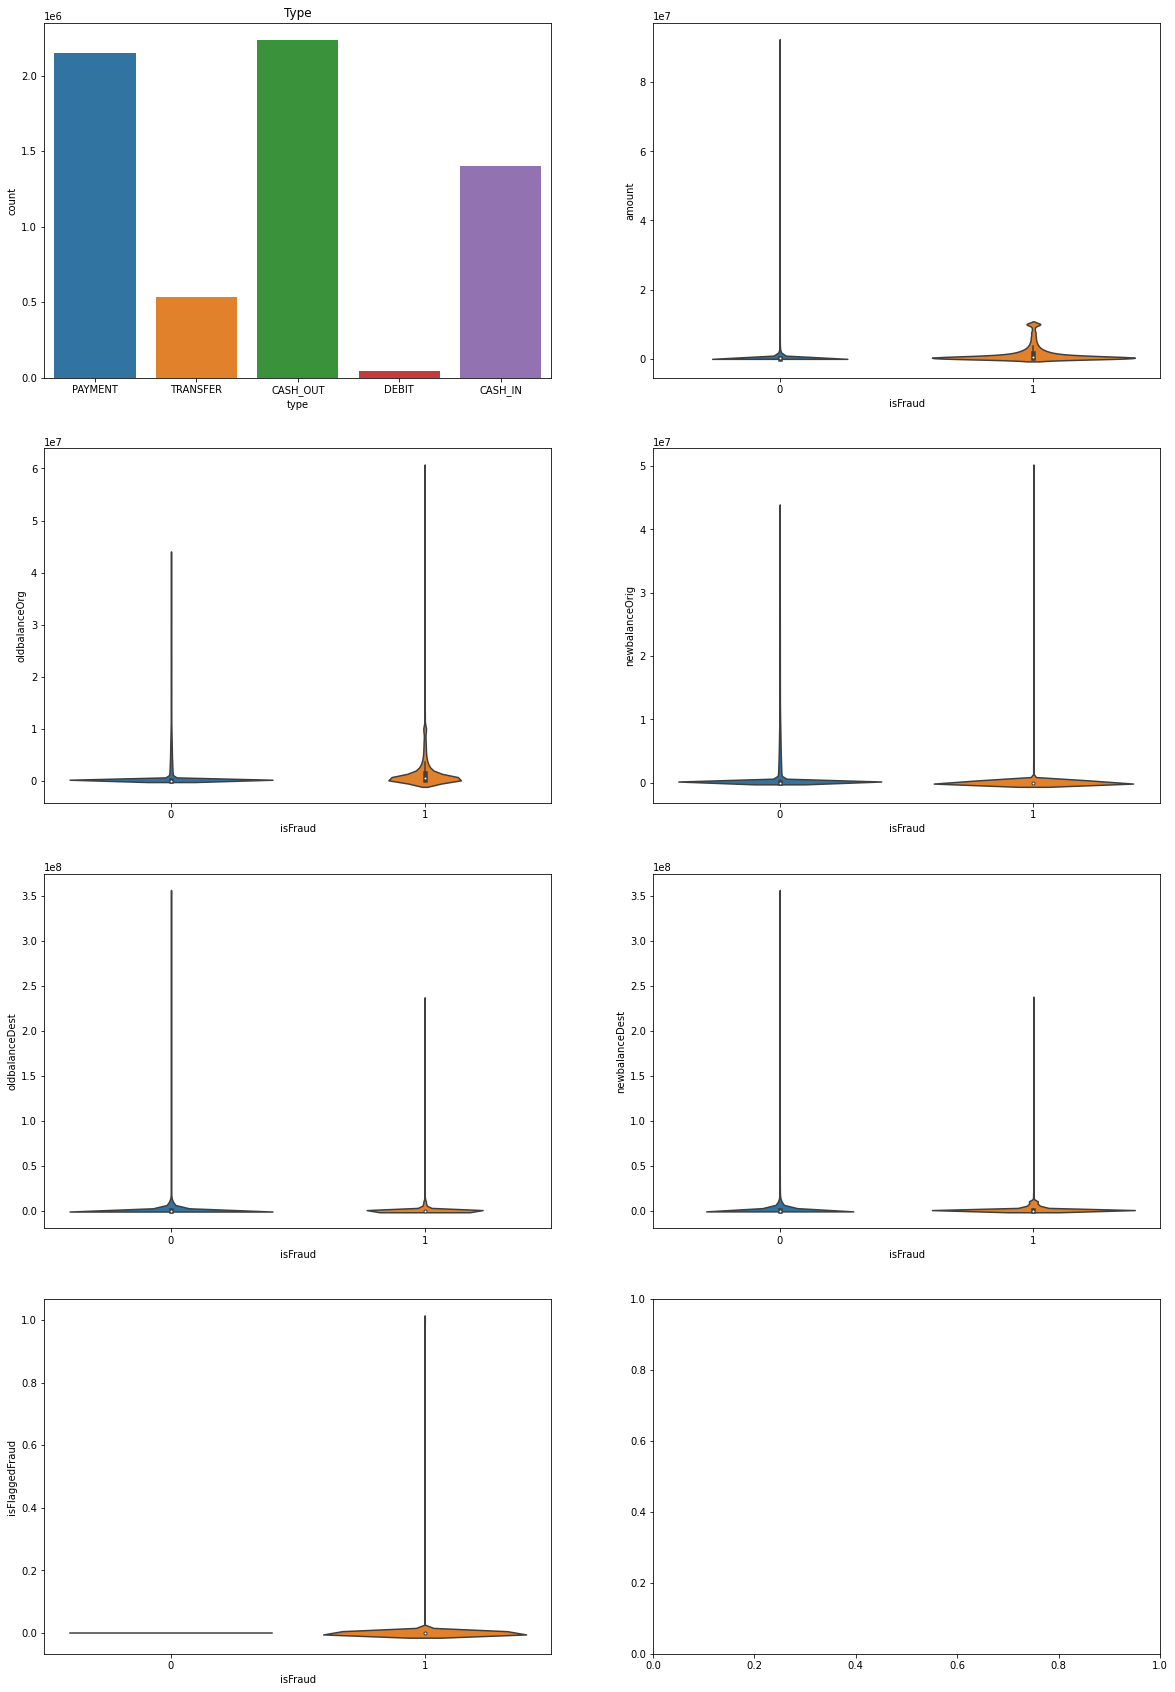

In [9]:
# graphical visualisation of data
fig,ax = plt.subplots(4,2, figsize=(20,30))

sns.countplot(x=df.type, ax=ax[0][0]).set_title("Type")
sns.violinplot(x=df.isFraud, y=df["amount"], ax=ax[0][1])
sns.violinplot(x=df.isFraud, y=df["oldbalanceOrg"], ax=ax[1][0])
sns.violinplot(x=df.isFraud, y=df["newbalanceOrig"], ax=ax[1][1])
sns.violinplot(x=df.isFraud, y=df["oldbalanceDest"], ax=ax[2][0])
sns.violinplot(x=df.isFraud, y=df["newbalanceDest"], ax=ax[2][1])
sns.violinplot(x=df.isFraud, y=df["isFlaggedFraud"], ax=ax[3][0])

# first graph shows the count per transaction type
# all the other graph shows the relation between the "isFraud" column and various other columns


"oldbalanceOrg" :- initial balance before the transaction

"newbalanceOrig" :- new balance after the transaction

here we are not actually interested in old and new balance
we whant to know how the balance is changing i.e. if new balance is more than old one or less

so will create another list variable and store 0 if new balance is less or 1 if new balance is more


In [10]:

old_balance = df["oldbalanceOrg"]
new_balance = df["newbalanceOrig"]
bal_change=[]

for i in tqdm(range(len(old_balance))):
    diff = new_balance[i]-old_balance[i]
    
    if diff>0:
        bal_change.append(0)
    else:
        bal_change.append(1)

100%|████████████████████████████████████████████████████████████████████| 6362620/6362620 [00:33<00:00, 188142.27it/s]


oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

here also will repeat the above process but here will also record the change in newbalanceDest and oldbalanceDestt

In [11]:
old_dest = df["oldbalanceDest"]
new_dest = df["newbalanceDest"]
dest_change=[]
dest_bal=[]
for i in tqdm(range(len(old_dest))):
    diff = new_dest[i]-old_dest[i]
    
    if diff>0:
        dest_change.append(0)
        dest_bal.append(abs(diff))
    else:
        dest_change.append(1)
        dest_bal.append(abs(diff))

100%|████████████████████████████████████████████████████████████████████| 6362620/6362620 [00:36<00:00, 176042.27it/s]


In [12]:
# add above columns to dataframe
df["bal_change"]=bal_change
df["destination"]=dest_bal
df["dest_change"]=dest_change

In [13]:
# drop the unnecessary columns
df.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],axis=1,inplace=True)

In [14]:
df.sample(5)

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,bal_change,destination,dest_change
4771673,335,PAYMENT,1628.90,C1392224553,M1176377959,0,0,1,0.00,1
3964096,297,CASH_OUT,221294.52,C1806521440,C791346528,0,0,1,221294.52,0
1858973,164,PAYMENT,21839.74,C18968728,M191240970,0,0,1,0.00,1
5110263,355,TRANSFER,232513.38,C583407914,C407922892,0,0,1,355602.13,0
3678221,276,CASH_OUT,130306.32,C1022683786,C423113173,0,0,1,130306.31,0


In [17]:
# seperate the target variable and independent variable
y = df["isFraud"]
print(y)
x = df.drop("isFraud", axis=1)
x

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64


,step,type,amount,nameOrig,nameDest,isFlaggedFraud,bal_change,destination,dest_change
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,1,0.00,1
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,1,0.00,1
2,1,TRANSFER,181.00,C1305486145,C553264065,0,1,0.00,1
3,1,CASH_OUT,181.00,C840083671,C38997010,0,1,21182.00,1
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0,1,0.00,1
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,C776919290,0,1,339682.13,0
6362616,743,TRANSFER,6311409.28,C1529008245,C1881841831,0,1,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,C1365125890,0,1,6311409.27,0
6362618,743,TRANSFER,850002.52,C1685995037,C2080388513,0,1,0.00,1


In [18]:
fraud=np.sum(y==1)
not_fraud=np.sum(y==0)
print(fraud)
print(not_fraud)

# as we can see here our data set is imbalance 
# there are too less fraud observations
# to deal with this will try XGB model as it can work well on imbalance data sets 

8213
6354407


In [19]:
# split the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5090096, 9)
(1272524, 9)
(5090096,)
(1272524,)


In [22]:
# convert categorical data to numeric data
le = preprocessing.LabelEncoder()
le.fit(df["type"])
train_type = le.transform(x_train["type"])
test_type = le.transform(x_test["type"])
train_type

array([0, 0, 3, ..., 1, 1, 1])

In [24]:
le2 = preprocessing.LabelEncoder()
le2.fit(df["nameOrig"])
train_nameOrig = le2.transform(x_train["nameOrig"])
test_nameOrig = le2.transform(x_test["nameOrig"])
train_nameOrig

array([4449199, 5813773, 5870502, ..., 1903639, 4311664, 6235529])

In [25]:
le3 = preprocessing.LabelEncoder()
le3.fit(df["nameDest"])
train_nameDest = le3.transform(x_train["nameDest"])
test_nameDest = le3.transform(x_test["nameDest"])
train_nameDest

array([ 289167,  204382, 1346491, ...,   35205,  284813,   88856])

In [26]:
x_train.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [27]:
x_train["type"]=train_type
x_train["nameOrig"]=train_nameOrig
x_train["nameDest"]=train_nameDest

In [28]:
x_train.head(5)

,step,amount,isFlaggedFraud,bal_change,destination,dest_change,type,nameOrig,nameDest
6271196,619,386385.08,0,0,386385.08,1,0,4449199,289167
1888243,164,212458.78,0,0,212458.78,1,0,5813773,204382
5549957,382,19967.60,0,1,0.00,1,3,5870502,1346491
2025342,180,527616.51,0,1,527616.51,0,1,5095916,446948
682342,36,206067.85,0,1,206067.84,0,4,5557736,338417


In [29]:
# drop the column with object type values
x_test.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [30]:
# concate newly converted lists to the test data
x_test["type"]=test_type
x_test["nameOrig"]=test_nameOrig
x_test["nameDest"]=test_nameDest

In [31]:
x_test.head(5)

,step,amount,isFlaggedFraud,bal_change,destination,dest_change,type,nameOrig,nameDest
3737323,278,330218.42,0,0,330218.42,1,0,5144186,523341
264914,15,11647.08,0,1,0.00,1,3,868156,1849210
85647,10,152264.21,0,0,152264.21,1,0,2453021,179836
5899326,403,1551760.63,0,1,1551760.63,0,4,4162339,167013
2544263,206,78172.30,0,0,78172.30,1,0,5740614,27202


In [40]:
# XGB model
xgb_model = xgb.XGBClassifier()

xgb_model.fit(x_train,y_train)

y_pred1 = xgb_model.predict(x_train)
accuracy1 = accuracy_score(y_train, y_pred1)

y_pred2 = xgb_model.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred2)

In [41]:
print("train accuracy : ",accuracy1)
print("test accuracy : ",accuracy2)

train accuracy :  0.9996544269499043
test accuracy :  0.9996117951409954


In [43]:
confusion_matrix(y_test,y_pred)

array([[1270867,      37],
       [    457,    1163]], dtype=int64)

In [44]:
print(classification_report(y_train, y_pred1))
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       0.99      0.74      0.85      6593

    accuracy                           1.00   5090096
   macro avg       0.99      0.87      0.92   5090096
weighted avg       1.00      1.00      1.00   5090096

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.72      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.86      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [46]:
# random forest classifier
clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train, y_train)

RandomForestClassifier()

In [49]:
y_pred_r = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_r)

In [50]:
accuracy

0.9995701456318309

In [51]:
confusion_matrix(y_test,y_pred_r)

array([[1270865,      39],
       [    508,    1112]], dtype=int64)

In [52]:
print(classification_report(y_test, y_pred_r))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.69      0.80      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.84      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524

